In [42]:
import numpy as np

def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

def sigmoid(x):
    return 1/(np.exp(-x)+1)    

def d_sigmoid(x):
    return sigmoid(x)*(np.ones(x.shape[0])-sigmoid(x))
    
class MLP(): 
    def __init__(self, nHidden, epoch=35, eta=0.008):
        self.nHidden = nHidden
        self.epoch = epoch
        self.eta = eta
        self.error = []
        self.accuracy = []
        self.terror = []
        self.taccuracy = []

    def _initialize_weights(self, X, y):
        n_features = X.shape[1]
        n_outputs = y.shape[1]
        # Hidden layer
        self.W  = np.random.uniform(-0.003, 0.003, (n_features, self.nHidden))
        self.w0 = np.zeros(self.nHidden)
        self.U = np.random.uniform(-0.003, 0.003, (self.nHidden, self.nHidden+147))
        self.u0 = np.zeros(self.nHidden+147)
        # Output layer
        self.V = np.random.uniform(-0.003, 0.003, (self.nHidden+147, n_outputs))
        self.v0 = np.zeros(n_outputs)
        

    def fit(self, X, y,test,y_test):

        self._initialize_weights(X, y)
        err = 0
        ac = 0
        su = 0
        terr = 0
        for ep in range(self.epoch):
            print(ep,"out of",self.epoch,"error:",err/2, "accuracy:",ac,"terror:",terr/2,"tacc:",su/test.shape[0])  
            err = 0
            ac = 0
            su = 0
            terr = 0
            for t in range(X.shape[0]):

                #  Forward Pass
                # HIDDEN LAYER
                hidden_input = X[t].dot(self.W) - self.w0
                hidden_output = sigmoid(hidden_input)

                hidden_input2 = hidden_output.dot(self.U) - self.u0
                hidden_output2 = sigmoid(hidden_input2)

                # OUTPUT LAYER
                output_layer_input = hidden_output2.dot(self.V) - self.v0
                y_pred = sigmoid(output_layer_input)

                err += sum((y[t]-y_pred)**2)

                if np.argmax(y_pred) == np.argmax(y[t]):
                    ac += 1

                #  Backward Pass
                # OUTPUT LAYER
                deltaO = (y[t]-y_pred)*(y_pred*(np.ones(y_pred.shape[0]) - y_pred))

                # HIDDEN LAYER
                deltaU = (self.V.dot(deltaO))*(hidden_output2*(np.ones(hidden_output2.shape[0])-hidden_output2))
                deltaW = (self.U.dot(deltaU))*(hidden_output*(np.ones(hidden_output.shape[0])-hidden_output))

                self.V += self.eta*np.outer(hidden_output2,deltaO)
                self.v0 -= self.eta * deltaO

                self.U += self.eta*np.outer(hidden_output,deltaU)
                self.u0 -= self.eta * deltaU

                self.W += self.eta*np.outer(X[t],deltaW)
                self.w0 -= self.eta * deltaW

            self.accuracy.append(ac/X.shape[0])
            self.error.append(err)
            
            for i in range(test.shape[0]):
                yt_pred = self.predict(test[i])
                terr += sum((y_test[i]-yt_pred)**2)
                if np.argmax(yt_pred) == np.argmax(y_test[i]):
                    su += 1
            self.taccuracy.append(su/test.shape[0])
            self.terror.append(terr/2)


    # Use the trained model to predict labels of X
    def predict(self, X):
        # Forward pass:
        # HIDDEN LAYER
        hidden_input = X.dot(self.W) - self.w0
        hidden_output = sigmoid(hidden_input)

        hidden_input2 = hidden_output.dot(self.U) - self.u0
        hidden_output2 = sigmoid(hidden_input2)

        # OUTPUT LAYER
        output_layer_input = hidden_output2.dot(self.V) - self.v0
        y_pred = sigmoid(output_layer_input)
        return y_pred

In [43]:
import tensorflow as tf
import keras
tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [44]:
y = np.zeros((y_train.shape[0],10))
for idx in range(y_train.shape[0]):
    y[idx][y_train[idx]] = 1

yt = np.zeros((y_test.shape[0],10))
for idx in range(y_test.shape[0]):
    yt[idx][y_test[idx]] = 1

xt = x_test.reshape(x_test.shape[0],784)
    
model = MLP(3)
model.fit(x_train.reshape(x_train.shape[0],784),y,xt,yt)

0 out of 35 error: 0.0 accuracy: 0 terror: 0.0 tacc: 0.0
1 out of 35 error: 27066.673075004768 accuracy: 5943 terror: 4499.491027050897 tacc: 0.0958
2 out of 35 error: 27017.896251796767 accuracy: 6386 terror: 4483.100855201282 tacc: 0.206


C:\Users\janah\AppData\Local\Temp\ipykernel_23884\2278304939.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(-x)+1)


3 out of 35 error: 26099.993412113625 accuracy: 10157 terror: 4145.759013514924 tacc: 0.1946
4 out of 35 error: 24572.968837352688 accuracy: 12837 terror: 3938.101683099119 tacc: 0.2358
5 out of 35 error: 24515.957637941076 accuracy: 14121 terror: 4187.058538824996 tacc: 0.2039
6 out of 35 error: 24728.064757768254 accuracy: 11750 terror: 4054.4908250126086 tacc: 0.2021
7 out of 35 error: 24588.666659150538 accuracy: 11404 terror: 4048.234348334956 tacc: 0.2037
8 out of 35 error: 24817.15894983177 accuracy: 10933 terror: 4154.697217149155 tacc: 0.1713
9 out of 35 error: 24467.15300895229 accuracy: 11820 terror: 4036.9346336410645 tacc: 0.2013
10 out of 35 error: 24306.873557617484 accuracy: 11724 terror: 4140.263904388589 tacc: 0.1735
11 out of 35 error: 24641.80243063047 accuracy: 10792 terror: 4030.089706113019 tacc: 0.1968
12 out of 35 error: 24385.548092859946 accuracy: 11474 terror: 4193.939315048001 tacc: 0.1625
13 out of 35 error: 24350.666709481346 accuracy: 11650 terror: 4025.

KeyboardInterrupt: 

[0.1028, 0.1028, 0.1028, 0.1874, 0.1135, 0.2115, 0.2334, 0.3277, 0.4002, 0.5044, 0.6778, 0.8338, 0.8976, 0.8967, 0.9085, 0.9104, 0.9059, 0.9114, 0.9156, 0.9191, 0.9172, 0.9198, 0.9173, 0.922, 0.9242, 0.9177, 0.9233, 0.9283, 0.9258, 0.9267, 0.9173, 0.9232, 0.9294, 0.9253, 0.9263]


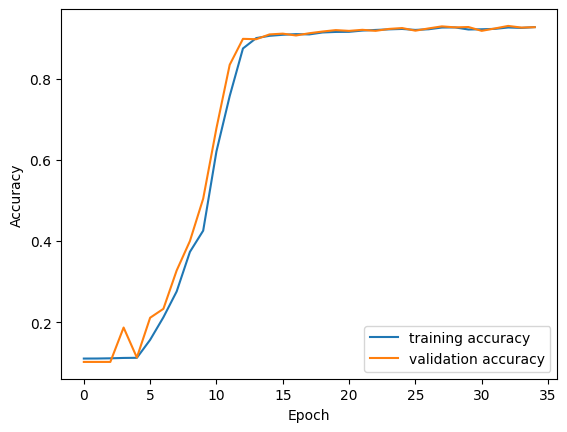

In [29]:
import matplotlib.pyplot as plt

x = []
for i in range(35):
    x.append(i)


print(model.taccuracy)
plt.plot(x,model.accuracy,label='training accuracy')
plt.plot(x,model.taccuracy,label='validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

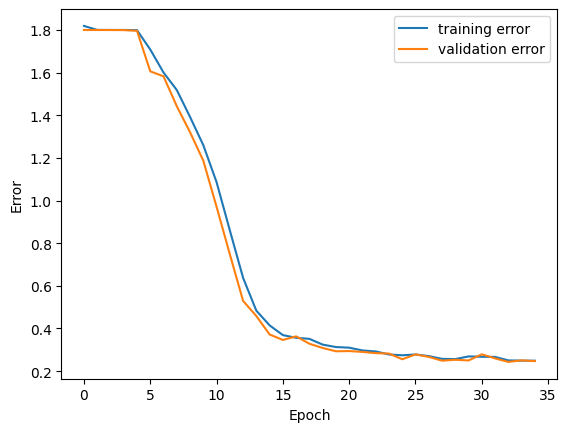

In [30]:
import matplotlib.pyplot as plt

x = []
for i in range(35):
    x.append(i)
te = []
for i in model.terror:
    te.append(np.mean(i)/(100*25))
plt.plot(x,np.array(model.error)/30000,label='training error')
plt.plot(x,te,label='validation error')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()